# IMPORTING LIBRARIES & DATASET

In this step we import all libraires that is required to proces our datset. Following this we will import our dataset. And the dataset that we use is the Happiness Index dataset

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing Dataset
dataset = pd.read_csv("Happiness-Data.csv")
dataset

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Upperwhisker,Lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:Log_GDP_per_capita,Explained_by:Social_support,Explained_by:Healthy_life_expectancy,Explained_by:Freedom_to_make_life_choices,Explained_by:Generosity,Explained_by:Perceptions_of_corruption,Dystopia_plus_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


# MISSING VALUES 

In this stage we will check if there is any missing values that are present in our dataset. this step is essential as presence of mising values could be serious bottlenecks in the processing of our dataset

In [3]:
#Finding Missing Values
print(dataset.isnull().sum())

Country_name                                 0
Regional_indicator                           0
Ladder_score                                 0
Standard_error_of_ladder_score               0
Upperwhisker                                 0
Lowerwhisker                                 0
Logged_GDP_per_capita                        0
Social_support                               0
Healthy_life_expectancy                      0
Freedom_to_make_life_choices                 0
Generosity                                   0
Perceptions_of_corruption                    0
Ladder_score_in_Dystopia                     0
Explained_by:Log_GDP_per_capita              0
Explained_by:Social_support                  0
Explained_by:Healthy_life_expectancy         0
Explained_by:Freedom_to_make_life_choices    0
Explained_by:Generosity                      0
Explained_by:Perceptions_of_corruption       0
Dystopia_plus_residual                       0
dtype: int64


# DATATYPES

The following step helps to identify the dtatype present in our dataset.

In [4]:
#Knowing the datatypes
dataset.dtypes

Country_name                                  object
Regional_indicator                            object
Ladder_score                                 float64
Standard_error_of_ladder_score               float64
Upperwhisker                                 float64
Lowerwhisker                                 float64
Logged_GDP_per_capita                        float64
Social_support                               float64
Healthy_life_expectancy                      float64
Freedom_to_make_life_choices                 float64
Generosity                                   float64
Perceptions_of_corruption                    float64
Ladder_score_in_Dystopia                     float64
Explained_by:Log_GDP_per_capita              float64
Explained_by:Social_support                  float64
Explained_by:Healthy_life_expectancy         float64
Explained_by:Freedom_to_make_life_choices    float64
Explained_by:Generosity                      float64
Explained_by:Perceptions_of_corruption       f

# CORRELATION

In this step we analyse the correlation between features . this step is essential as it helps to identify the redundant features in our dataset

<AxesSubplot:>

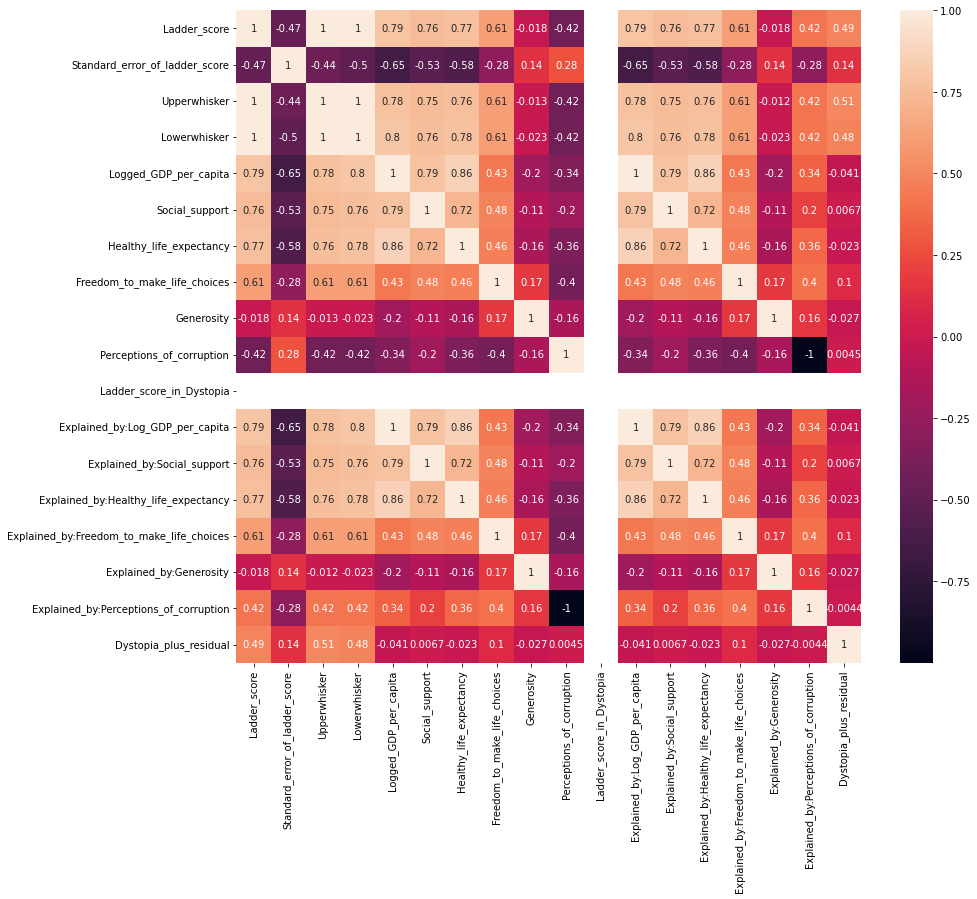

In [5]:
#Finding the correlation between features using Heatmaps
plt.figure(figsize=(14,12))
sns.heatmap(dataset.corr(), annot = True)

# DROPPING REDUNDANT FEATURES

In this step,we filter out all the redundant features that are not necessary for our analysis. In the below step we take all those features that have correlation above 95%.

In [6]:
#Finding the features to be dropped
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [7]:
#Numeric feature
num_features = dataset.select_dtypes(include=[np.number])
x= num_features
x

,Ladder_score,Standard_error_of_ladder_score,Upperwhisker,Lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:Log_GDP_per_capita,Explained_by:Social_support,Explained_by:Healthy_life_expectancy,Explained_by:Freedom_to_make_life_choices,Explained_by:Generosity,Explained_by:Perceptions_of_corruption,Dystopia_plus_residual
0,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [8]:
#List of Features to be dropped
corr_features = correlation(x, 0.95)
len(set(corr_features))

8

In [9]:
corr_features

{'Explained_by:Freedom_to_make_life_choices',
 'Explained_by:Generosity',
 'Explained_by:Healthy_life_expectancy',
 'Explained_by:Log_GDP_per_capita',
 'Explained_by:Perceptions_of_corruption',
 'Explained_by:Social_support',
 'Lowerwhisker',
 'Upperwhisker'}

In [10]:
df_unclean = dataset.drop(labels=['Explained_by:Freedom_to_make_life_choices','Explained_by:Generosity','Explained_by:Healthy_life_expectancy', 'Explained_by:Log_GDP_per_capita','Explained_by:Perceptions_of_corruption','Explained_by:Social_support','Lowerwhisker','Upperwhisker', 'Ladder_score_in_Dystopia'],axis=1)
df_unclean

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205


In [11]:
df_unclean.describe()

,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,0.022001,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,0.026000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,0.043000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,0.054000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,0.070000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,0.173000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000


In [12]:
df_unclean.shape

(149, 11)

In [13]:
#Removing Outliers
df_unclean.dtypes

Country_name                       object
Regional_indicator                 object
Ladder_score                      float64
Standard_error_of_ladder_score    float64
Logged_GDP_per_capita             float64
Social_support                    float64
Healthy_life_expectancy           float64
Freedom_to_make_life_choices      float64
Generosity                        float64
Perceptions_of_corruption         float64
Dystopia_plus_residual            float64
dtype: object

# DROPPING STRINGS

Since strings cannot be normalized, we will rmove all the strings in our dataset, before normalizing the data

In [14]:
df = df_unclean.drop(labels=['Country_name','Regional_indicator'],axis=1)
df.shape

(149, 9)

# NORMALIZATION OF FEATURES

Data Normalization is the process of rescaling the data in a dataset and improving its integrity by eliminating data redundancy.

In [15]:
#Normalize the data attributes 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df_scaled = pd.DataFrame(d, columns=names)
df_scaled.head()

,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual
0,1.000000,0.040816,0.826018,0.944231,0.826058,0.964286,0.228916,0.121354,0.919195
1,0.958263,0.061224,0.857542,0.944231,0.850641,0.959184,0.383133,0.113186,0.783345
2,0.949051,0.068027,0.894254,0.921154,0.910342,0.913265,0.377108,0.245041,0.773112
3,0.945854,0.224490,0.846568,1.000000,0.861176,0.974490,0.539759,0.689615,0.818278
4,0.928934,0.006803,0.857342,0.921154,0.840105,0.903061,0.557831,0.298716,0.758645


In [16]:
df_scaled

,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual
0,1.000000,0.040816,0.826018,0.944231,0.826058,0.964286,0.228916,0.121354,0.919195
1,0.958263,0.061224,0.857542,0.944231,0.850641,0.959184,0.383133,0.113186,0.783345
2,0.949051,0.068027,0.894254,0.921154,0.910342,0.913265,0.377108,0.245041,0.773112
3,0.945854,0.224490,0.846568,1.000000,0.861176,0.974490,0.539759,0.689615,0.818278
4,0.928934,0.006803,0.857342,0.921154,0.840105,0.903061,0.557831,0.298716,0.758645
...,...,...,...,...,...,...,...,...,...
144,0.185937,0.639456,0.257582,0.623077,0.007796,0.566327,0.189157,0.971995,0.406493
145,0.177477,0.326531,0.627893,0.617308,0.378964,0.751701,0.050602,0.838973,0.000000
146,0.167701,0.285714,0.207702,0.171154,0.453802,0.875850,0.420482,0.099183,0.157728
147,0.116939,0.217687,0.260974,0.551923,0.271220,0.501701,0.290361,0.862310,0.196542


# DIMENSIONALITY REDUCTION

 Dimensionality Reduction is the process by which we convert a high dimensionality dataset into a low dimensionality dataset. In this step we aim to reduce our dataset into a lower dimensional dataset that would capture a variance above 90%.

<function matplotlib.pyplot.show(close=None, block=None)>

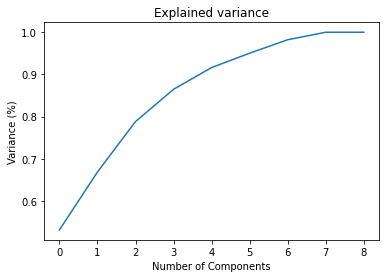

In [17]:
pca = PCA()
principalcomponents = pca.fit_transform(df_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained variance')
plt.show

([<matplotlib.axis.XTick at 0x1fd27d9ba90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

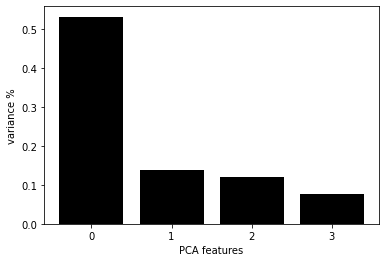

In [18]:
# Create a PCA instance: pca
pca = PCA(n_components= 4)
principalcomponents = pca.fit_transform(df_scaled)


# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [19]:
pca.explained_variance_

array([0.19731337, 0.05108018, 0.04444634, 0.02847664])

In [20]:
df_scaled.shape

(149, 9)

In [21]:
principalcomponents.shape

(149, 4)

In [22]:
final_data = pd.DataFrame(principalcomponents)
final_data

,0,1,2,3
0,-0.812843,-0.403520,-0.033039,-0.364954
1,-0.806137,-0.406561,0.132447,-0.262178
2,-0.795928,-0.303061,0.080548,-0.207664
3,-0.659003,-0.244814,-0.131830,0.223924
4,-0.725330,-0.363897,0.130740,-0.068857
...,...,...,...,...
144,0.782258,0.167867,0.030607,0.112149
145,0.289910,0.478688,0.447787,0.013413
146,0.454698,-0.325152,0.835318,-0.384152
147,0.624717,0.297304,0.358794,0.044177


# TYPES OF DENDROGRAMS

There are mainly 4 types of linkages used in Agglomerative clustering, namely – Complete, 
Ward, Single and Average. In the figure below, we cans see the dendrograms with these
linkages. Among these linkages ward linkage is giving a perfect division of clusters according
to the dendrograms plotted. Moreover, Ward linkage can minimize  cluster
variance and it is ideal for datasets with considerable number of outliers.

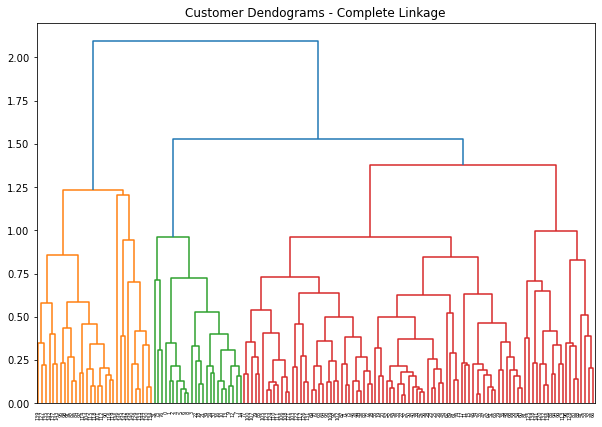

In [23]:
#Plotting Dendrogram using Complete linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms - Complete Linkage")
dend = shc.dendrogram(shc.linkage(final_data, method='complete'))

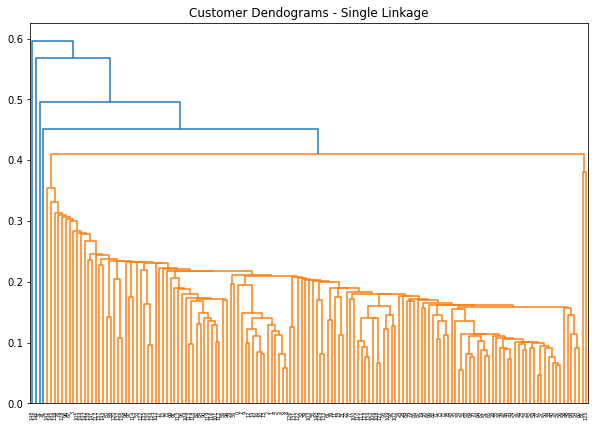

In [24]:
#Plotting Dendrogram using Single linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms - Single Linkage")
dend = shc.dendrogram(shc.linkage(final_data, method='single'))

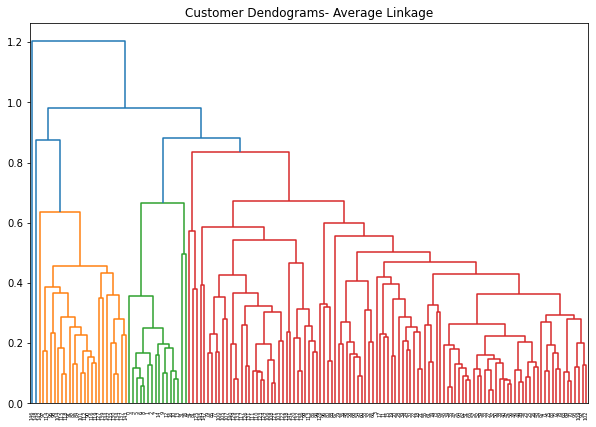

In [25]:
#Plotting Dendrogram using Average linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms- Average Linkage")
dend = shc.dendrogram(shc.linkage(final_data, method='average'))

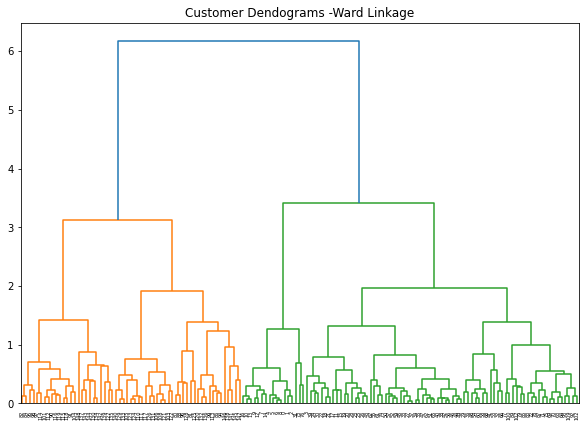

In [26]:
#Plotting Dendrogram using Ward linkage

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms -Ward Linkage")
dend = shc.dendrogram(shc.linkage(final_data, method='ward'))

# ANALYZING DENDROGRAMS

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(final_data)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
df_clustered=df_unclean
df_clustered['clusters']=cluster.fit_predict(final_data).tolist()
df_clustered

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800,1
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648,1
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095,1
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205,1


In [29]:
#Dystopia countries
df_clustered[df_clustered.clusters==1]

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
80,Malaysia,Southeast Asia,5.384,0.049,10.238,0.817,67.102,0.895,0.125,0.839,1.784,1
81,Indonesia,Southeast Asia,5.345,0.056,9.365,0.811,62.236,0.873,0.542,0.867,1.987,1
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,0.097,8.117,0.636,58.221,0.695,-0.068,0.745,3.476,1
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,8.551,0.644,50.114,0.741,-0.016,0.794,3.469,1
86,Nepal,South Asia,5.269,0.070,8.120,0.774,64.233,0.782,0.152,0.727,2.642,1
88,Maldives,South Asia,5.198,0.072,9.826,0.913,70.600,0.854,0.024,0.825,1.520,1
90,Cameroon,Sub-Saharan Africa,5.142,0.074,8.189,0.710,53.515,0.731,0.026,0.848,3.195,1
91,Senegal,Sub-Saharan Africa,5.132,0.068,8.118,0.710,59.802,0.695,-0.046,0.801,3.071,1
94,Ghana,Sub-Saharan Africa,5.088,0.067,8.580,0.727,57.586,0.807,0.123,0.848,2.684,1
95,Niger,Sub-Saharan Africa,5.074,0.102,7.098,0.641,53.780,0.806,0.018,0.693,3.470,1


In [30]:
df_clustered[df_clustered.clusters==1].shape

(59, 12)

In [31]:
#Utopian Countries
df_clustered[df_clustered.clusters==0]

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,North Macedonia,Central and Eastern Europe,5.101,0.051,9.693,0.805,65.474,0.751,0.038,0.905,2.042,0
100,Bangladesh,South Asia,5.025,0.046,8.454,0.693,64.800,0.877,-0.041,0.682,2.427,0
102,South Africa,Sub-Saharan Africa,4.956,0.060,9.403,0.860,56.904,0.749,-0.067,0.860,2.187,0
107,Georgia,Commonwealth of Independent States,4.891,0.054,9.585,0.671,64.300,0.783,-0.238,0.655,2.191,0


In [32]:
df_clustered.sort_values( by="Ladder_score",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800,1
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648,1
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095,1
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205,1


In [33]:
df_clustered.sort_values( by="Standard_error_of_ladder_score",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
142,Haiti,Latin America and Caribbean,3.615,0.173,7.477,0.540,55.700,0.593,0.422,0.721,2.060,1
36,Jamaica,Latin America and Caribbean,6.309,0.156,9.186,0.877,67.500,0.890,-0.137,0.884,3.135,0
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800,1
139,Burundi,Sub-Saharan Africa,3.775,0.107,6.635,0.490,53.400,0.626,-0.024,0.607,2.876,1
119,Liberia,Sub-Saharan Africa,4.625,0.106,7.288,0.720,56.498,0.735,0.050,0.850,2.857,1
...,...,...,...,...,...,...,...,...,...,...,...,...
75,Russia,Commonwealth of Independent States,5.477,0.033,10.189,0.903,64.703,0.718,-0.111,0.845,2.148,0
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
83,China,East Asia,5.339,0.029,9.673,0.811,69.593,0.904,-0.146,0.755,1.982,0
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0


In [34]:
df_clustered.sort_values( by="Logged_GDP_per_capita",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
7,Luxembourg,Western Europe,7.324,0.037,11.647,0.908,72.600,0.907,-0.034,0.386,2.653,0
31,Singapore,Southeast Asia,6.377,0.043,11.488,0.915,76.953,0.927,-0.018,0.082,1.379,0
14,Ireland,Western Europe,7.085,0.040,11.342,0.947,72.400,0.879,0.077,0.363,2.384,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,11.085,0.844,67.333,0.932,0.074,0.589,2.422,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,Liberia,Sub-Saharan Africa,4.625,0.106,7.288,0.720,56.498,0.735,0.050,0.850,2.857,1
114,Mozambique,Sub-Saharan Africa,4.794,0.103,7.158,0.744,54.706,0.882,0.061,0.684,2.783,1
95,Niger,Sub-Saharan Africa,5.074,0.102,7.098,0.641,53.780,0.806,0.018,0.693,3.470,1
143,Malawi,Sub-Saharan Africa,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1


In [35]:
df_clustered.sort_values( by="Generosity",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
81,Indonesia,Southeast Asia,5.345,0.056,9.365,0.811,62.236,0.873,0.542,0.867,1.987,1
125,Myanmar,Southeast Asia,4.426,0.052,8.541,0.779,59.302,0.876,0.509,0.660,1.407,1
97,Gambia,Sub-Saharan Africa,5.051,0.089,7.686,0.690,55.160,0.697,0.424,0.746,2.990,1
142,Haiti,Latin America and Caribbean,3.615,0.173,7.477,0.540,55.700,0.593,0.422,0.721,2.060,1
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,8.836,0.918,65.255,0.970,0.311,0.515,2.477,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,Georgia,Commonwealth of Independent States,4.891,0.054,9.585,0.671,64.300,0.783,-0.238,0.655,2.191,0
57,Portugal,Western Europe,5.929,0.055,10.421,0.879,72.600,0.892,-0.244,0.887,2.225,0
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648,1
55,Japan,East Asia,5.940,0.040,10.611,0.884,75.100,0.796,-0.258,0.638,2.048,0


In [36]:
df_clustered.sort_values( by="Social_support",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,9.629,0.983,62.409,0.877,0.273,0.888,1.409,1
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
5,Norway,Western Europe,7.392,0.035,11.053,0.954,73.300,0.960,0.093,0.270,2.580,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142,Haiti,Latin America and Caribbean,3.615,0.173,7.477,0.540,55.700,0.593,0.422,0.721,2.060,1
143,Malawi,Sub-Saharan Africa,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1
139,Burundi,Sub-Saharan Africa,3.775,0.107,6.635,0.490,53.400,0.626,-0.024,0.607,2.876,1
98,Benin,Sub-Saharan Africa,5.045,0.073,8.087,0.489,54.713,0.757,-0.034,0.661,3.482,1


In [37]:
df_clustered.sort_values( by="Healthy_life_expectancy",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
31,Singapore,Southeast Asia,6.377,0.043,11.488,0.915,76.953,0.927,-0.018,0.082,1.379,0
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,11.000,0.836,76.820,0.717,0.067,0.403,1.236,0
55,Japan,East Asia,5.940,0.040,10.611,0.884,75.100,0.796,-0.258,0.638,2.048,0
26,Spain,Western Europe,6.491,0.042,10.571,0.932,74.700,0.761,-0.081,0.745,2.513,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,Swaziland,Sub-Saharan Africa,4.308,0.071,9.065,0.770,50.833,0.647,-0.185,0.708,2.155,1
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,8.551,0.644,50.114,0.741,-0.016,0.794,3.469,1
115,Nigeria,Sub-Saharan Africa,4.759,0.052,8.533,0.740,50.102,0.737,0.037,0.878,2.736,1
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800,1


In [38]:
df_clustered.sort_values( by="Freedom_to_make_life_choices",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,8.836,0.918,65.255,0.970,0.311,0.515,2.477,0
5,Norway,Western Europe,7.392,0.035,11.053,0.954,73.300,0.960,0.093,0.270,2.580,0
113,Cambodia,Southeast Asia,4.830,0.067,8.360,0.765,62.000,0.959,0.034,0.843,2.148,1
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
...,...,...,...,...,...,...,...,...,...,...,...,...
134,Madagascar,Sub-Saharan Africa,4.208,0.072,7.396,0.686,59.305,0.552,-0.005,0.803,2.620,1
130,Comoros,Sub-Saharan Africa,4.289,0.084,8.031,0.626,57.349,0.548,0.082,0.781,2.610,1
122,Lebanon,Middle East and North Africa,4.584,0.055,9.626,0.848,67.355,0.525,-0.073,0.898,1.736,1
108,Algeria,Middle East and North Africa,4.887,0.053,9.342,0.802,66.005,0.480,-0.067,0.752,2.242,1


In [39]:
df_clustered.sort_values( by="Perceptions_of_corruption",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
59,Croatia,Central and Eastern Europe,5.882,0.048,10.217,0.924,70.799,0.754,-0.118,0.939,2.325,0
45,Romania,Central and Eastern Europe,6.140,0.057,10.284,0.832,67.355,0.845,-0.219,0.938,2.830,0
87,Bulgaria,Central and Eastern Europe,5.266,0.054,10.016,0.931,67.000,0.788,-0.096,0.932,1.823,0
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,0.050,9.590,0.870,68.098,0.706,0.113,0.931,2.583,0
148,Afghanistan,South Asia,2.523,0.038,7.695,0.463,52.493,0.382,-0.102,0.924,1.895,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6,Sweden,Western Europe,7.363,0.036,10.867,0.934,72.700,0.945,0.086,0.237,2.683,0
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095,1


In [40]:
df_clustered.sort_values( by="Dystopia_plus_residual",ascending=False)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_plus_residual,clusters
98,Benin,Sub-Saharan Africa,5.045,0.073,8.087,0.489,54.713,0.757,-0.034,0.661,3.482,1
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,0.097,8.117,0.636,58.221,0.695,-0.068,0.745,3.476,1
95,Niger,Sub-Saharan Africa,5.074,0.102,7.098,0.641,53.780,0.806,0.018,0.693,3.470,1
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,8.551,0.644,50.114,0.741,-0.016,0.794,3.469,1
15,Costa Rica,Latin America and Caribbean,7.069,0.056,9.880,0.891,71.400,0.934,-0.126,0.809,3.387,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,11.000,0.836,76.820,0.717,0.067,0.403,1.236,0
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205,1
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095,1
128,Sri Lanka,South Asia,4.325,0.066,9.470,0.827,67.299,0.841,0.079,0.863,1.075,1
